In [1]:
import os
import cv2
import time
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import combinations

from diploma.drawing import draw_images
from diploma.models import FaceRecONNX, FaceDetectorONNX
from diploma.utils import cosine_simularity, align_face

In [2]:
path= "E:/kbtu_courses/diploma_project/src/diploma/photos/analysis_data"

detector = FaceDetectorONNX("E:\kbtu_courses\diploma_project\src\diploma\models\detector\weights\model_detector.onnx")
recog = FaceRecONNX('E:/kbtu_courses/diploma_project/src/diploma/models/recognition/weights/model_recognition.onnx')

In [3]:
total = 0

for folder in tqdm(os.listdir(path)):
    if os.path.isdir(os.path.join(path, folder)):
        folder_path = os.path.join(path, folder)
        image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
        total += len(image_files)

print("Total number of images:", total)

100%|██████████| 300/300 [00:00<00:00, 4948.76it/s]

Total number of images: 1411


# Preprocess

In [ ]:
# больше не запускать!
for foldername, subfolders, filenames in os.walk(path):
    if len(filenames) == 1:
        to_del2 = os.path.join(path, foldername)
        to_del1 = os.path.join(to_del2, filenames[0])
        os.remove(to_del1)
        os.rmdir(to_del2)    

In [4]:
data1 = []

for folder in tqdm(os.listdir(path)):
    if os.path.isdir(os.path.join(path, folder)):
        folder_path = os.path.join(path, folder)
        image_paths = [os.path.join(folder_path, img) for img in os.listdir(folder_path)]
        for pair in combinations(image_paths, 2):
            x1 = cv2.imread(pair[0])
            x2 = cv2.imread(pair[1])

            face_bbox1, face_landmarks1 = detector(x1)
            face_bbox2, face_landmarks2 = detector(x2)

            aligned1 = align_face(x1, face_bbox1[0][:-1], face_landmarks1[0])
            aligned2 = align_face(x2, face_bbox2[0][:-1], face_landmarks2[0])

            embed1 = recog(aligned1)
            embed2 = recog(aligned2)

            score = float(cosine_simularity(embed1, embed2)[0][0])
            label = 1 if folder in pair[0] and folder in pair[1] else 0
            data1.append([pair[0], pair[1], score, label])

df1 = pd.DataFrame(data1, columns=['Person_1', 'Person_2', 'Score', 'Label'])

100%|██████████| 300/300 [09:13<00:00,  1.84s/it]  


In [5]:
data2 = []
folders = os.listdir(path)

for i in range(0, 2):
    folder_path_1 = os.path.join(path, folders[i])
    images_in_folder_1 = [os.path.join(folder_path_1, img) for img in os.listdir(folder_path_1)]

    for j in tqdm(range(i+1, len(folders))):
        folder_path_2 = os.path.join(path, folders[j])
        images_in_folder_2 = [os.path.join(folder_path_2, img) for img in os.listdir(folder_path_2)]

        for img_path_1 in images_in_folder_1:
            for img_path_2 in images_in_folder_2:
                x1 = cv2.imread(img_path_1)
                x2 = cv2.imread(img_path_2)

                face_bbox1, face_landmarks1 = detector(x1)
                face_bbox2, face_landmarks2 = detector(x2)

                aligned1 = align_face(x1, face_bbox1[0][:-1], face_landmarks1[0])
                aligned2 = align_face(x2, face_bbox2[0][:-1], face_landmarks2[0])

                embed1 = recog(aligned1)
                embed2 = recog(aligned2)

                score = float(cosine_simularity(embed1, embed2)[0][0])
                label = 1 if folders[i] == folders[j] else 0
                data2.append([img_path_1, img_path_2, score, label])

df2 = pd.DataFrame(data2, columns=['Person_1', 'Person_2', 'Score', 'Label'])

100%|██████████| 298/298 [02:48<00:00,  1.77it/s]


In [8]:
df1

,Person_1,Person_2,Score,Label
0,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.777984,1
1,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.717150,1
2,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.564553,1
3,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.748814,1
4,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.632357,1
...,...,...,...,...
9606,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.578179,1
9607,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.612248,1
9608,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.853552,1
9609,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.875265,1


In [11]:
df2

,Person_1,Person_2,Score,Label
0,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.042050,0
1,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.027205,0
2,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.018193,0
3,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.001912,0
4,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.042933,0
...,...,...,...,...
8433,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.059410,0
8434,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.003812,0
8435,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.002349,0
8436,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.017446,0


In [12]:
df = pd.concat([df1, df2], ignore_index=True)

In [13]:
df

,Person_1,Person_2,Score,Label
0,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.777984,1
1,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.717150,1
2,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.564553,1
3,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.748814,1
4,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.632357,1
...,...,...,...,...
18044,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.059410,0
18045,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.003812,0
18046,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,0.002349,0
18047,E:/kbtu_courses/diploma_project/src/diploma/ph...,E:/kbtu_courses/diploma_project/src/diploma/ph...,-0.017446,0


In [14]:
df.to_csv("recognition_quality.csv", index=False)

# Quality

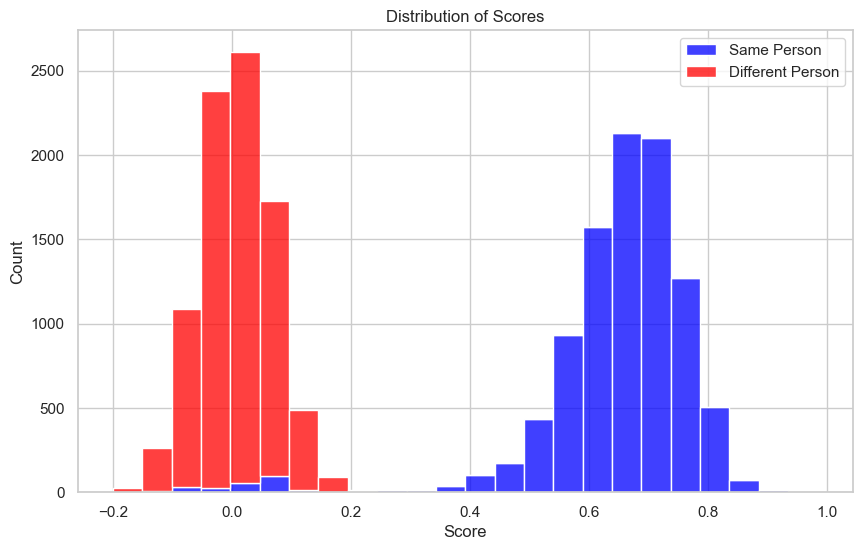

In [3]:
df = pd.read_csv("recognition_quality.csv")

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Score', hue='Label', multiple='stack', palette=['red', 'blue'])

plt.xlabel('Score')

plt.title('Distribution of Scores')
plt.legend(title='', labels=['Same Person', 'Different Person'], loc='upper right')
plt.show()

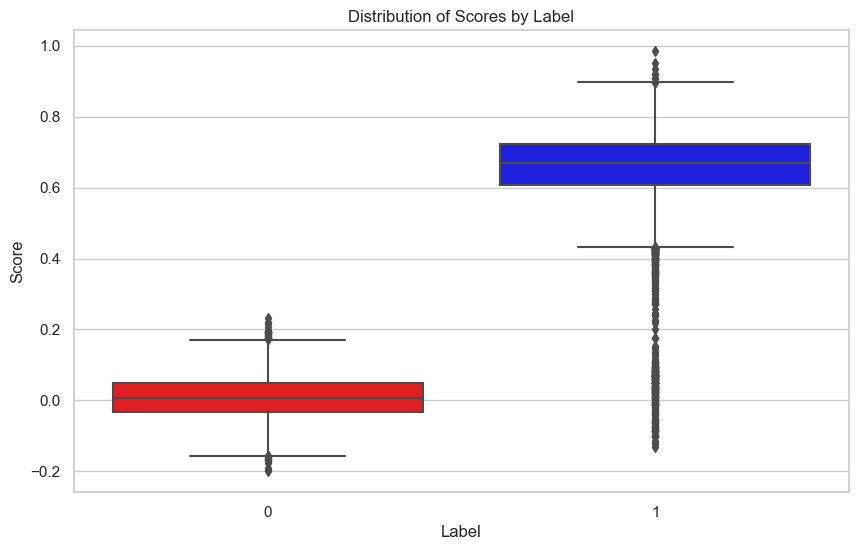

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Label', y='Score', palette=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Score')
plt.title('Distribution of Scores')
plt.show()

In [24]:
df[df['Label']==1].describe()

,Score,Label
count,9611.000000,9611.0
mean,0.648777,1.0
std,0.131839,0.0
min,-0.131464,1.0
25%,0.606972,1.0
50%,0.669752,1.0
75%,0.723062,1.0
max,0.984570,1.0


In [25]:
df[df['Label']==0].describe()

,Score,Label
count,8438.000000,8438.0
mean,0.007520,0.0
std,0.059245,0.0
min,-0.200008,0.0
25%,-0.033672,0.0
50%,0.006829,0.0
75%,0.048429,0.0
max,0.231180,0.0


# Speed

In [26]:
speed_path = "E:/kbtu_courses/diploma_project/src/diploma/photos/analysis_data/Adrien_Brody"

image_paths = [os.path.join(speed_path, filename) for filename in os.listdir(speed_path) if filename.endswith('.jpg')]


computation_times = []

for i in range(len(image_paths)):
    for j in range(i+1, len(image_paths)):
        start_time = time.time()
        x1 = cv2.imread(image_paths[i])
        x2 = cv2.imread(image_paths[j])

        face_bbox1, face_landmarks1 = detector(x1)
        face_bbox2, face_landmarks2 = detector(x2)

        aligned1 = align_face(x1, face_bbox1[0][:-1], face_landmarks1[0])
        aligned2 = align_face(x2, face_bbox2[0][:-1], face_landmarks2[0])

        embed1 = recog(aligned1)
        embed2 = recog(aligned2)

        score = float(cosine_simularity(embed1, embed2)[0][0])
        end_time = time.time()

        computation_time = end_time - start_time
        computation_times.append(computation_time)

average = sum(computation_times) / len(computation_times)
print("Average computation time:", average, "seconds")

Average computation time: 0.05395252415628144 seconds


In [27]:
speed_path = "E:/kbtu_courses/diploma_project/src/diploma/photos/analysis_data/Adrien_Brody"

image_paths = [os.path.join(speed_path, filename) for filename in os.listdir(speed_path) if filename.endswith('.jpg')]


computation_times = []

for i in range(len(image_paths)):
    for j in range(i+1, len(image_paths)):
        x1 = cv2.imread(image_paths[i])
        x2 = cv2.imread(image_paths[j])

        face_bbox1, face_landmarks1 = detector(x1)
        face_bbox2, face_landmarks2 = detector(x2)

        aligned1 = align_face(x1, face_bbox1[0][:-1], face_landmarks1[0])
        aligned2 = align_face(x2, face_bbox2[0][:-1], face_landmarks2[0])
        start_time = time.time()
        embed1 = recog(aligned1)
        embed2 = recog(aligned2)

        score = float(cosine_simularity(embed1, embed2)[0][0])
        end_time = time.time()

        computation_time = end_time - start_time
        computation_times.append(computation_time)

average = sum(computation_times) / len(computation_times)
print("Average computation time:", average, "seconds")

Average computation time: 0.019526347969517563 seconds
